# <font color=red>Loan Prediciton

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# read DataFrame
df=pd.read_csv("LoansTrainingSet.csv")

### <font color=blue>EDA - Exploratory Data Analysis

In [3]:
# Get Basic Information of the DataFrame

In [4]:
df.head()
#first 5 lines

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df.tail()
#last 5 files

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [6]:
df.sample(5)
#random 5 lines

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
64164,3fd53768-0fc1-4217-b3d2-12e026235f77,96d83ce5-e446-40ff-8e3b-645b1755a3a4,Charged Off,23813,Short Term,745.0,1 year,Home Mortgage,64493.0,Debt Consolidation,"$1,338.23",15.3,NaN,6,0,30094,30866,0.0,0.0
127776,7f1bf70d-2f02-4205-82d8-12118215c3c1,a425018b-d056-4c0e-9d80-bd31085aedc2,Charged Off,24588,Short Term,712.0,2 years,Home Mortgage,78680.0,Debt Consolidation,"$1,429.35",15.4,NaN,14,0,5225,24304,0.0,0.0
109734,6cfe5573-acc1-4a8d-8aae-4c19be817e25,6bbb36c2-f2d0-429c-ad14-55f9840aa16a,Fully Paid,18256,Short Term,749.0,10+ years,Own Home,99392.0,Debt Consolidation,"$1,085.02",19.0,NaN,7,0,9167,24777,0.0,0.0
99759,631f85ac-0f13-488d-a962-5b7ffcf6cd7e,fc317b6d-af27-40bf-a775-b7e0be0b7f50,Charged Off,11845,Long Term,742.0,2 years,Rent,61200.0,Debt Consolidation,$626.79,15.5,NaN,11,0,13802,55429,0.0,0.0
204999,cc0695d6-17cd-41ed-8572-64aa9c1bc568,0595ffb1-3ac6-4618-b792-a0141fad47f0,Fully Paid,99999999,Short Term,751.0,7 years,Home Mortgage,78163.0,Debt Consolidation,$476.79,19.4,NaN,9,0,22159,55956,0.0,0.0


In [7]:
df.info()
#we see that we have 19 columns, incl object, int and float as datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
df.describe()
#statistic values

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [9]:
df.corr()
#correlation between the columns

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


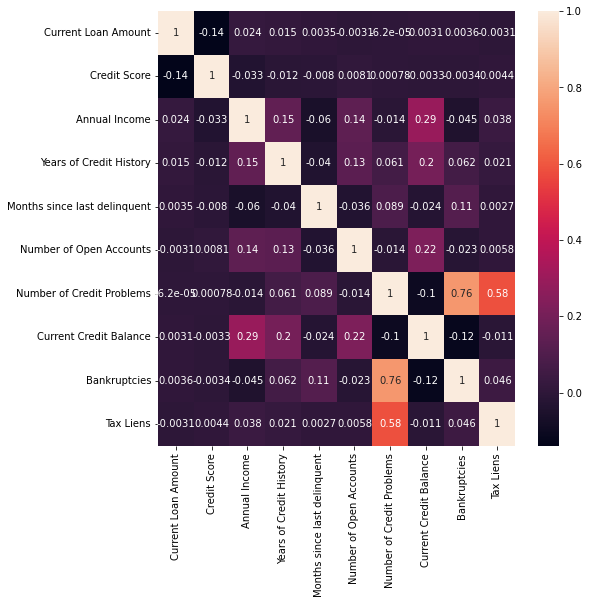

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [11]:
df.shape

(256984, 19)

In [12]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [13]:
df.isnull().sum()
#check for empty columns, and fill them

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [14]:
df['Credit Score']

0          741.0
1          734.0
2          747.0
3          747.0
4          746.0
           ...  
256979       NaN
256980     737.0
256981    7460.0
256982     746.0
256983     678.0
Name: Credit Score, Length: 256984, dtype: float64

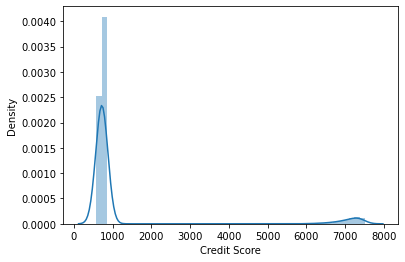

In [15]:
sns.distplot(df['Credit Score']);
#There are many inbetween 1000, but much outliers above up to 7000+

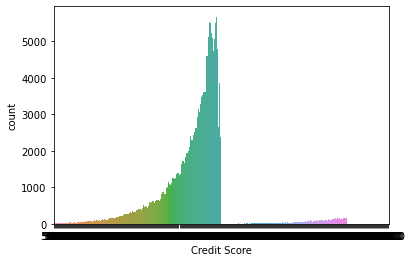

In [16]:
sns.countplot(x=df["Credit Score"]);

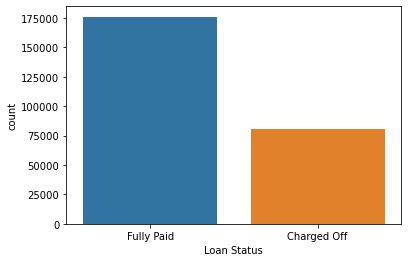

In [17]:
sns.countplot(x=df["Loan Status"]);

In [18]:
# fill empty rows with mean value in Credit Score
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)

In [19]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

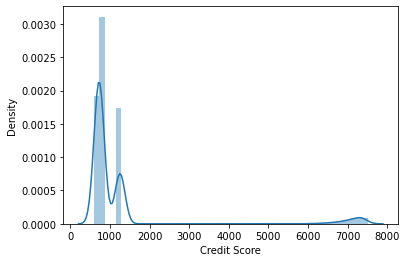

In [20]:
sns.distplot(df['Credit Score']);

In [21]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,256984.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1536.090361,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,722.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,740.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,1251.116099,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [22]:
# ignore the outliers, focus on the credit score up to 1800
df=df[df["Credit Score"]<1800]

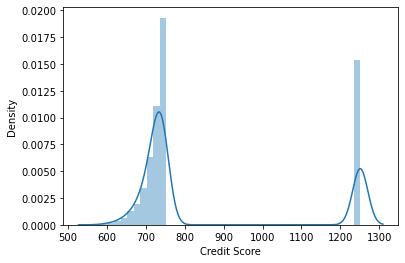

In [23]:
sns.distplot(df['Credit Score']);

In [24]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             10527
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131685
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       505
Tax Liens                           23
dtype: int64

In [25]:
df[["Years in current job"]]
# datatype is object, turn into int

,Years in current job
0,10+ years
1,4 years
2,10+ years
3,10+ years
4,4 years
...,...
256978,10+ years
256979,2 years
256980,10+ years
256982,9 years


In [26]:
#remove punctiation
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)

In [27]:
# fill empty rows with 0 so that we can turn into integer
df["Years in current job"].fillna("0", inplace=True)

In [28]:
# turn "Years in current job" from object to int
df["Years in current job"] = df["Years in current job"].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240797 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240797 non-null  object 
 1   Customer ID                   240797 non-null  object 
 2   Loan Status                   240797 non-null  object 
 3   Current Loan Amount           240797 non-null  int64  
 4   Term                          240797 non-null  object 
 5   Credit Score                  240797 non-null  float64
 6   Years in current job          240797 non-null  int32  
 7   Home Ownership                240797 non-null  object 
 8   Annual Income                 179121 non-null  float64
 9   Purpose                       240797 non-null  object 
 10  Monthly Debt                  240797 non-null  object 
 11  Years of Credit History       240797 non-null  float64
 12  Months since last delinquent  109112 non-nul

In [30]:
df.isnull().sum()
# now years in current job is not null and integer

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131685
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       505
Tax Liens                           23
dtype: int64

In [31]:
# replce 0's with mean value of "Years in current job" to provide better answer
df["Years in current job"] = df['Years in current job'].replace("0",df['Years in current job'].mean())

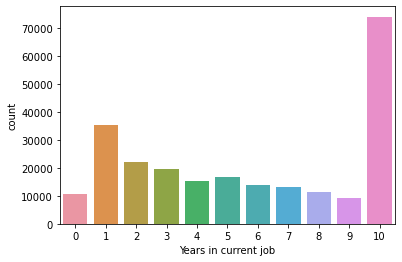

In [32]:
sns.countplot(x=df["Years in current job"]);

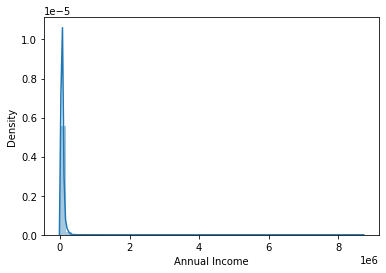

In [33]:
sns.distplot(df['Annual Income']);

In [34]:
# fill empty rows with Annual income mean value
df['Annual Income'].fillna(df["Annual Income"].mean(),inplace=True)

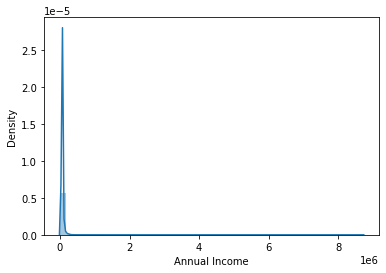

In [35]:
sns.distplot(df['Annual Income']);

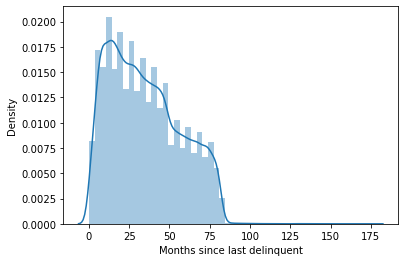

In [36]:
sns.distplot(df['Months since last delinquent']);

In [37]:
# fill empty rows with mean value and turn into integer
df["Months since last delinquent"].fillna(df["Months since last delinquent"].mean(),inplace=True)
df["Months since last delinquent"] = df["Months since last delinquent"].astype(int)

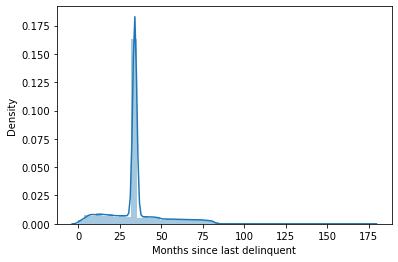

In [38]:
sns.distplot(df['Months since last delinquent']);

In [39]:
# ignore the values above 80
df=df[df["Months since last delinquent"]<80]

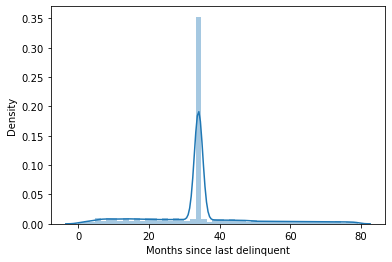

In [40]:
sns.distplot(df['Months since last delinquent']);

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

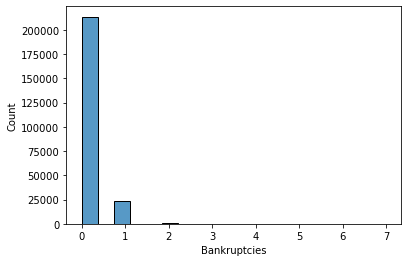

In [41]:
sns.histplot(df['Bankruptcies'])

In [42]:
# fill empty rows with mean value and turn into integer
df["Bankruptcies"].fillna(df["Bankruptcies"].mean(),inplace=True)
df["Bankruptcies"] = df["Bankruptcies"].astype(int)

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

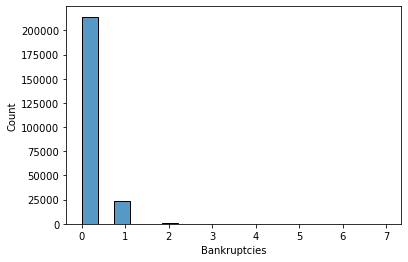

In [43]:
sns.histplot(df['Bankruptcies'])

In [44]:
# ignore the values above 3
df=df[df["Bankruptcies"]<3]

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

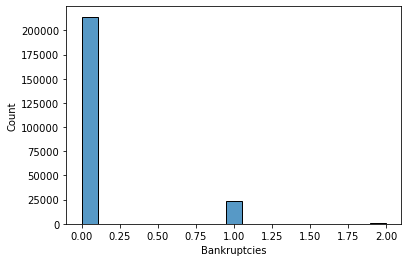

In [45]:
sns.histplot(df['Bankruptcies'])

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

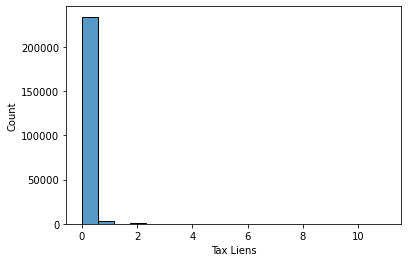

In [46]:
sns.histplot(df['Tax Liens'])

In [47]:
# fill empty rows with mean value and turn into integer
df["Tax Liens"].fillna(df["Tax Liens"].mean(),inplace=True)
df["Tax Liens"] = df["Tax Liens"].astype(int)

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

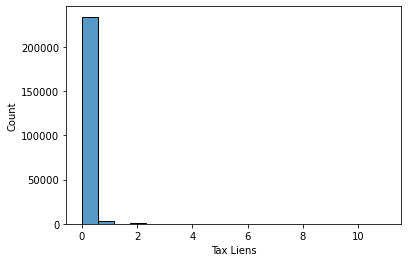

In [48]:
sns.histplot(df['Tax Liens'])

In [49]:
# ignore the values above 3
df=df[df["Tax Liens"]<3]

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

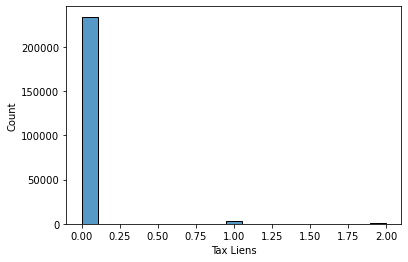

In [50]:
sns.histplot(df['Tax Liens'])

In [51]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
196028,c2ec1b12-49aa-4bfd-9453-2c103fa3c8e9,a70f0f8d-fc4d-4c77-b4bb-e706b4841a5d,Fully Paid,14316,Long Term,689.000000,4,Home Mortgage,147254.000000,Debt Consolidation,"$2,932.82",24.5,34,18,0,40151,58530,0,0
222352,dd4515fb-dd98-4dab-97d6-41a696f1f558,a617386a-70a7-46ff-8c55-324e78f645fc,Fully Paid,17611,Long Term,1251.116099,10,Home Mortgage,72535.550103,Debt Consolidation,"$1,086.02",23.9,34,12,1,21038,26036,1,0
62257,3dfad188-9fd1-4794-8076-e43192ef66d2,383cc219-636d-4535-9f7b-ec1af0b03d5e,Fully Paid,99999999,Short Term,733.000000,2,Rent,44555.000000,Debt Consolidation,$597.77,6.6,11,11,0,8490,13455,0,0
10739,0ab21b00-3639-430b-baf1-24a359c9bcaa,ad46e7d1-75bd-43c7-8e29-49fe03ae467b,Fully Paid,1227,Short Term,737.000000,10,Home Mortgage,81784.000000,Debt Consolidation,$872.36,19.5,34,13,0,24466,51398,0,0
191918,bedc301d-02c7-4071-9803-d5b6dba4ba0b,4631f2fa-bcd0-4e42-9e5c-c1e83f3ece8c,Fully Paid,99999999,Short Term,710.000000,5,Home Mortgage,54874.000000,Debt Consolidation,$273.45,16.8,73,7,0,7221,10171,0,0


In [52]:
#remove punctiation
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
# convert Monthly Debt to float
df['Monthly Debt']=df['Monthly Debt'].astype(float)

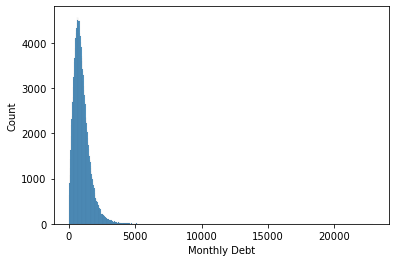

In [53]:
sns.histplot(df['Monthly Debt']);

In [54]:
#ignore values over 5000
df=df[df['Monthly Debt']<5000]

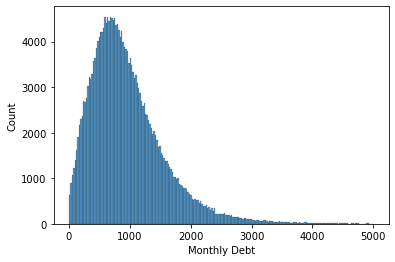

In [55]:
sns.histplot(df['Monthly Debt']);

In [56]:
# replace symbols with zero and turn 'Maximum open Credit' to integer
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df["Maximum Open Credit"]=df["Maximum Open Credit"].astype(int)

In [57]:
df.isnull().sum()
#now all columns ar not empty and the right Datatype

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [58]:
# show datatype objects
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,Home Mortgage,other
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,Own Home,Debt Consolidation
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...,...,...
256976,fffe5140-8725-4fd1-b3bf-9e59cb7834eb,df856c29-ce44-4df7-94a6-bd758a1c1332,Charged Off,Short Term,Rent,Business Loan
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,Short Term,Home Mortgage,Debt Consolidation
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,Rent,Debt Consolidation
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,Own Home,Debt Consolidation


In [59]:
df["Purpose"].value_counts()
#we can see that there are two "other", "Other", probaly written accidentaly wrong

Debt Consolidation      188924
Home Improvements        13883
other                    13120
Other                     9045
Business Loan             4222
Buy a Car                 3105
Medical Bills             2636
Take a Trip               1465
Buy House                 1418
Educational Expenses       253
Name: Purpose, dtype: int64

In [60]:
#combine the two "other", "Other" values
df["Purpose"].replace("other","Other",inplace=True)

In [61]:
df["Purpose"].value_counts()

Debt Consolidation      188924
Other                    22165
Home Improvements        13883
Business Loan             4222
Buy a Car                 3105
Medical Bills             2636
Take a Trip               1465
Buy House                 1418
Educational Expenses       253
Name: Purpose, dtype: int64

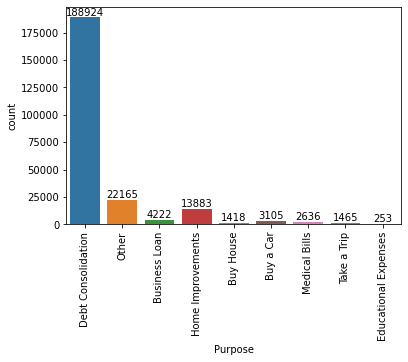

In [62]:
ax=sns.countplot(x=df['Purpose'])
plt.xticks(rotation=90);
ax.bar_label(ax.containers[0]);

In [63]:
df["Home Ownership"].value_counts()
#we can assume that "HaveMortgage" is the same the "Home Mortgage"

Home Mortgage    116014
Rent             100352
Own Home          21168
HaveMortgage        537
Name: Home Ownership, dtype: int64

In [64]:
#combine the two Mortgages
df['Home Ownership'].replace("Home Mortgage","HaveMortgage",inplace=True)

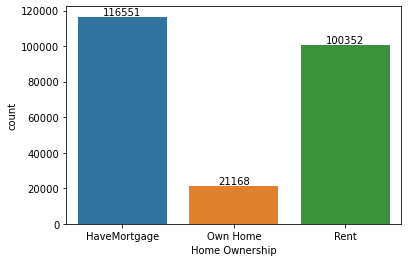

In [65]:
ax=sns.countplot(x=df['Home Ownership'])
ax.bar_label(ax.containers[0]);

In [66]:
df['Term'].value_counts()

Short Term    180219
Long Term      57852
Name: Term, dtype: int64

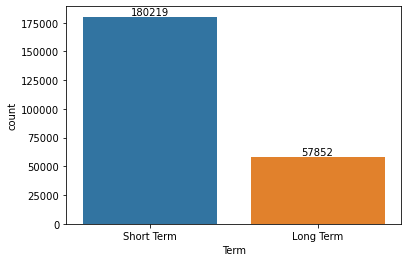

In [67]:
ax=sns.countplot(x=df["Term"])
ax.bar_label(ax.containers[0]);

In [68]:
df['Loan Status'].value_counts()

Fully Paid     174282
Charged Off     63789
Name: Loan Status, dtype: int64

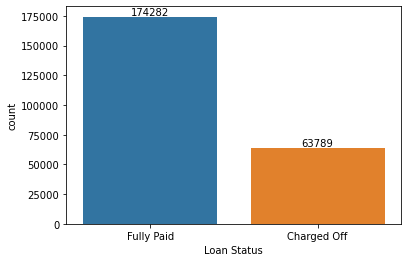

In [69]:
ax=sns.countplot(x=df['Loan Status'])
ax.bar_label(ax.containers[0]);

In [70]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
185602,b8949d01-d7d0-48c4-b3ef-8166a38aa428,05469eba-d384-4bc9-aaf1-ebad52f86e7a,Charged Off,6694,Short Term,726.000000,0,Rent,19198.000000,Debt Consolidation,91.99,14.0,34,9,2,4034,30557,0,1
251035,fa0ecfd8-1f5f-4cd8-b9fe-d7ac4d274d9e,734e8d4d-3e6b-474e-aefc-a58db196f50c,Fully Paid,9131,Short Term,1251.116099,8,HaveMortgage,72535.550103,Debt Consolidation,1275.69,16.1,56,9,0,9430,36691,0,0
78098,4d870b26-ce46-4fb4-b287-73df53ffb581,96c8931e-8163-41dd-baa4-930141cce6ef,Fully Paid,17712,Short Term,735.000000,10,HaveMortgage,50955.000000,Debt Consolidation,811.03,31.0,78,7,0,17480,24586,0,0
33776,219f449e-a497-43d9-b94f-b69f0d3bd30e,2b5b36d6-26dc-4b26-b910-2f9d5319ac12,Fully Paid,99999999,Short Term,746.000000,1,HaveMortgage,65221.000000,Debt Consolidation,1190.28,10.4,34,9,1,5820,20860,1,0
187847,badeb53f-bfed-4407-855c-b178f80d99ff,7a5d0ad3-aa33-45bd-833d-a5dd9858f001,Fully Paid,15284,Short Term,705.000000,9,Rent,50525.000000,Debt Consolidation,463.14,10.3,34,7,0,15065,18394,0,0


In [71]:
# we don't think Loan ID and Customer ID have any impact, so we can delete these rows
del df["Loan ID"]

In [72]:
del df["Customer ID"]

In [73]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
79968,Fully Paid,15167,Short Term,736.000000,8,HaveMortgage,80888.000000,Debt Consolidation,1166.13,14.6,46,13,0,24430,30424,0,0
26692,Charged Off,5004,Short Term,734.000000,3,HaveMortgage,42034.000000,Debt Consolidation,718.07,13.0,34,11,2,11360,16023,1,0
56149,Fully Paid,35651,Short Term,1251.116099,1,HaveMortgage,72535.550103,Debt Consolidation,2682.31,16.3,72,20,0,42384,46627,0,0
47251,Fully Paid,33546,Long Term,676.000000,10,Own Home,168096.000000,Debt Consolidation,2549.45,19.0,11,13,0,43722,64870,0,0
210303,Fully Paid,27969,Short Term,650.000000,0,Rent,62379.000000,Other,511.51,17.6,8,4,0,5037,16302,0,0


In [74]:
df.shape

(238071, 17)

In [75]:
x = df.drop('Loan Status',axis=1) # x = every column without Loan Status
y = df[['Loan Status']]           # y = Loan Status column

In [76]:
x.shape, y.shape

((238071, 16), (238071, 1))

In [77]:
x=pd.get_dummies(x,drop_first=True) #sparse matrix

In [78]:
x.shape

(238071, 24)

In [79]:
x

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,741.000000,10,33694.000000,584.03,12.3,41,10,0,6760,...,0,0,0,0,1,0,0,0,0,0
1,3441,734.000000,4,42269.000000,1106.04,26.3,34,17,0,6262,...,0,0,0,0,0,0,0,0,1,0
2,21029,747.000000,10,90126.000000,1321.85,28.8,34,5,0,20967,...,0,0,0,0,1,0,0,0,0,0
3,18743,747.000000,10,38072.000000,751.92,26.2,34,9,0,22529,...,1,0,0,0,1,0,0,0,0,0
4,11731,746.000000,4,50025.000000,355.18,11.5,34,12,0,17391,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256976,34710,700.000000,9,148755.000000,47.11,34.0,1,3,0,2590,...,0,1,0,0,0,0,0,0,0,0
256978,11953,717.000000,10,39844.000000,982.82,11.7,34,9,1,4176,...,0,0,0,0,1,0,0,0,0,0
256979,3911,1251.116099,2,72535.550103,1706.58,19.9,34,16,0,43992,...,0,1,0,0,1,0,0,0,0,0
256980,5078,737.000000,10,77186.000000,1376.47,19.1,47,9,0,1717,...,1,0,0,0,1,0,0,0,0,0


In [80]:
y

,Loan Status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
256976,Charged Off
256978,Charged Off
256979,Fully Paid
256980,Fully Paid


### <font color=blue>Classification - Accuracy, Precision, Recall, F1 Score & Confusion Matrix

In [81]:
#import libraries for Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#I had problems with fit SVC and KN, I don't know why the [*] never ended end the result didn't come after several minutes

g=GaussianNB()
b=BernoulliNB()
gb=GradientBoostingClassifier()
r=RandomForestClassifier()
d=DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
#split the data 20% test and 80& train size
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [83]:
# Fit & Predict

In [84]:
# fit & predict models
predG=g.fit(x_train,y_train).predict(x_test)
predB=b.fit(x_train,y_train).predict(x_test)
predGB=gb.fit(x_train,y_train).predict(x_test)
predR=r.fit(x_train,y_train).predict(x_test)
predD=d.fit(x_train,y_train).predict(x_test)

In [85]:
accuracy_score(y_test,predG)

0.4152472960201617

In [86]:
confusion_matrix(y_test,predG)

array([[12778,    29],
       [27814,  6994]], dtype=int64)

In [87]:
print(classification_report(y_test,predG))

              precision    recall  f1-score   support

 Charged Off       0.31      1.00      0.48     12807
  Fully Paid       1.00      0.20      0.33     34808

    accuracy                           0.42     47615
   macro avg       0.66      0.60      0.41     47615
weighted avg       0.81      0.42      0.37     47615



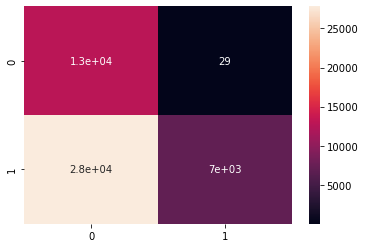

In [88]:
sns.heatmap(confusion_matrix(y_test,predG),annot=True);

In [89]:
accuracy_score(y_test,predB) #Bernoulli shows better results than Gaussian

0.7313031607686653

In [90]:
confusion_matrix(y_test,predB)

array([[   99, 12708],
       [   86, 34722]], dtype=int64)

In [91]:
print(classification_report(y_test,predB))

              precision    recall  f1-score   support

 Charged Off       0.54      0.01      0.02     12807
  Fully Paid       0.73      1.00      0.84     34808

    accuracy                           0.73     47615
   macro avg       0.63      0.50      0.43     47615
weighted avg       0.68      0.73      0.62     47615



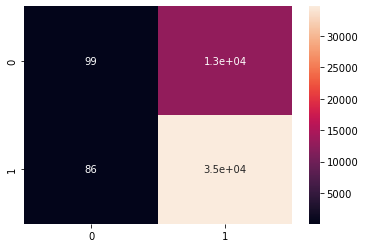

In [92]:
sns.heatmap(confusion_matrix(y_test,predB),annot=True);

In [93]:
accuracy_score(y_test,predGB)

0.7489446602961252

In [94]:
accuracy_score(y_test,predR) #best results - RandomForest Classifier

0.831082642024572

In [95]:
accuracy_score(y_test,predD)

0.7420140711960517

In [96]:
confusion_matrix(y_test,predGB)

array([[ 2481, 10326],
       [ 1628, 33180]], dtype=int64)

In [97]:
confusion_matrix(y_test,predR)

array([[ 6414,  6393],
       [ 1650, 33158]], dtype=int64)

In [98]:
confusion_matrix(y_test,predD)

array([[ 7683,  5124],
       [ 7160, 27648]], dtype=int64)

In [99]:
print(classification_report(y_test,predGB))

              precision    recall  f1-score   support

 Charged Off       0.60      0.19      0.29     12807
  Fully Paid       0.76      0.95      0.85     34808

    accuracy                           0.75     47615
   macro avg       0.68      0.57      0.57     47615
weighted avg       0.72      0.75      0.70     47615



In [100]:
print(classification_report(y_test,predR))

              precision    recall  f1-score   support

 Charged Off       0.80      0.50      0.61     12807
  Fully Paid       0.84      0.95      0.89     34808

    accuracy                           0.83     47615
   macro avg       0.82      0.73      0.75     47615
weighted avg       0.83      0.83      0.82     47615



In [101]:
print(classification_report(y_test,predD))

              precision    recall  f1-score   support

 Charged Off       0.52      0.60      0.56     12807
  Fully Paid       0.84      0.79      0.82     34808

    accuracy                           0.74     47615
   macro avg       0.68      0.70      0.69     47615
weighted avg       0.76      0.74      0.75     47615



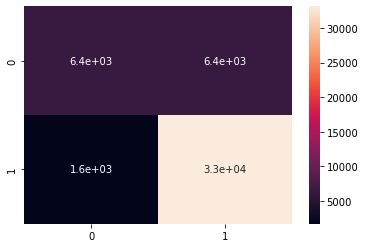

In [105]:
sns.heatmap(confusion_matrix(y_test,predR),annot=True);

### <font color=green>Define a function to call all Classification Algorithms

In [102]:
#!pip install xgboost

In [103]:
def classification_function(x,y):
    #import all algos
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    #import all metrics
    from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report
    
    #split the data 20% test and 80& train size
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
    
    #put all algorithms and their names in seperate lists
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    # put metric in empty list so the scores can be saved in them
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train) # train models for all algos
        #fit & predict for all scoring methods and add them to their lists
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    #put the score methods as columns
    result=pd.DataFrame(columns=['accuracy_score','precision_score','recall_score','f1_score'],index=algo_names)
    #assign the results
    result.accuracy_score=accuracy_scored
    result.precision_score=precision_scored
    result.recall_score=recall_scored
    result.f1_score=f1_scored
    
    #sort and return the results
    classification_function.result=result.sort_values('accuracy_score',ascending=False)
    return result.sort_values('accuracy_score',ascending=False) 

In [104]:
# call function
#classification_function(x,y) -- not working